In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.cosmology import Planck18 as cosmos
from astropy import units as u
h = cosmos.H0.value/100

several important scales

In [28]:
l = 2048
print('l cut scale ', 200/l * 60, 'arcmin')
print('nside=2048 scale ', hp.nside2resol(2048, True), 'arcmin')
print('nside=1024 scale ', hp.nside2resol(1024, True), 'arcmin')

l cut scale  5.859375 arcmin
nside=2048 scale  1.717743205908703 arcmin
nside=1024 scale  3.435486411817406 arcmin


## run this first to read the large file

In [3]:
quasar_lss_all = np.load('../catalogue/quasar_lss_all.npy')
quasar_lss = np.load('../catalogue/quasar_lss.npy')
quasar_lowz = np.load('../catalogue/quasar_lowz.npy')
quasar_highz = np.load('../catalogue/quasar_highz.npy')

In [30]:
shift = 1.05

# Basic result

In [20]:
lmax = 2048
angular_scale = 200/lmax * np.pi/180

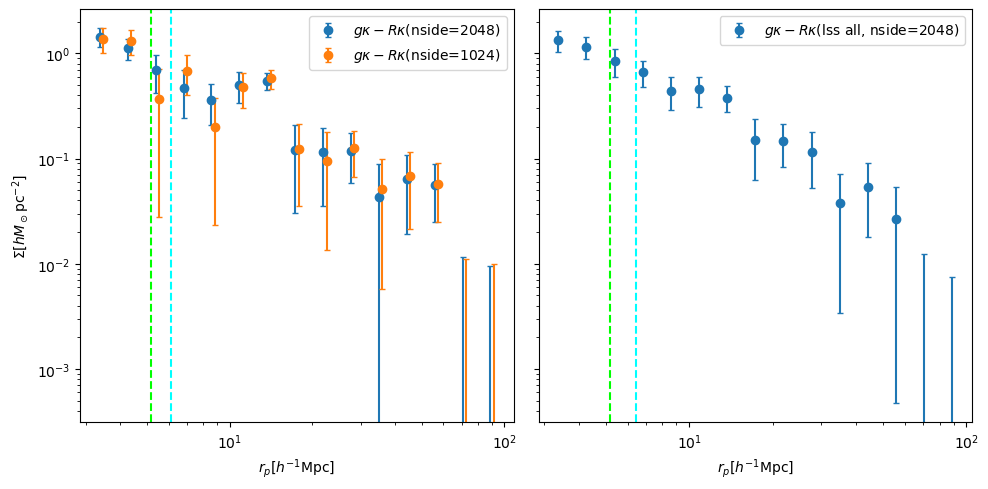

In [21]:
res_1 = np.loadtxt('./results/quasar_lss_cmb_lcut_n_2048')
res_2 = np.loadtxt('./results/quasar_lss_cmb_lcut')
res_3 = np.loadtxt('./results/quasar_lss_all_cmb_lcut_2048')

r_p = res_1[:,0]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

ax = axes[0]
ax.errorbar(r_p, res_1[:,1], res_1[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$(nside=2048)')
ax.errorbar(r_p*shift, res_2[:,1], res_2[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$(nside=1024)')

z = quasar_lss['z'].mean()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
z_max = quasar_lss['z'].max()
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
ax.loglog()
ax.legend(loc='upper right')

ax = axes[1]
ax.errorbar(r_p, res_3[:,1], res_3[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$(lss all, nside=2048)')

z = quasar_lss_all['z'].mean()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
z_max = quasar_lss_all['z'].max()
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.loglog()
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

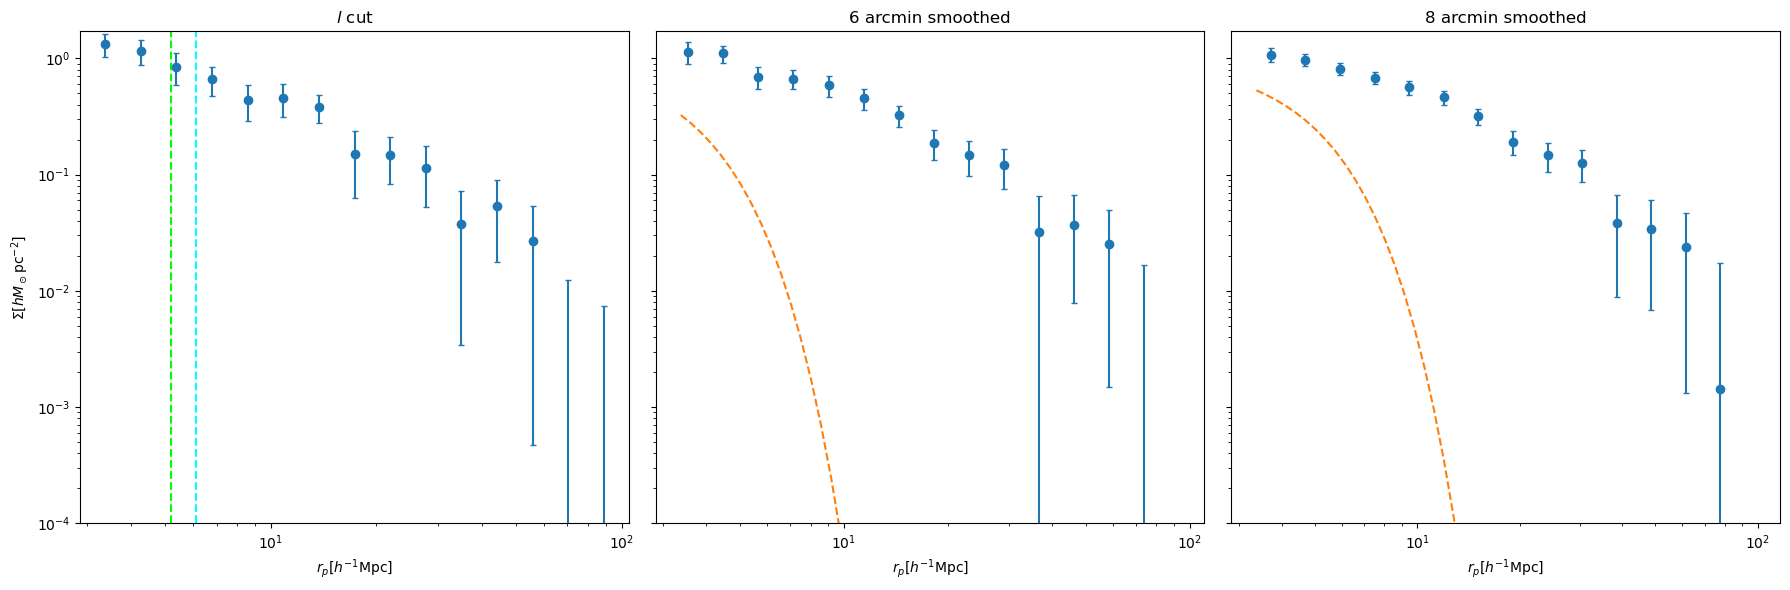

In [43]:
res_1 = np.loadtxt('./results/quasar_lss_all_cmb_lcut_2048')
res_2 = np.loadtxt('./results/quasar_lss_all_cmb_smoothed_6')
res_3 = np.loadtxt('./results/quasar_lss_all_cmb_smoothed_8')

r_p = res_1[:,0]

z = quasar_lss_all['z'].mean()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
z_max = quasar_lss_all['z'].max()
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 6))

ax = axes[0]
ax.errorbar(r_p, res_1[:,1], res_1[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$[$l$ cut]')
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
ax.set_ylim(bottom=1e-4)
ax.loglog()
ax.set_title('$l$ cut')

r_pp = np.geomspace(r_p[0], r_p[-1], 50)

ax = axes[1]
ax.errorbar(r_p*shift, res_2[:,1], res_2[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$[smoothed 6 arcmin]')
sigma_angular = (6 * u.arcmin).to(u.rad).value / np.sqrt(8*np.log(2))
sigma = distance*sigma_angular
ax.plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma*sigma)), '--')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.loglog()
ax.set_title('6 arcmin smoothed')


ax = axes[2]
ax.errorbar(r_p*shift*shift, res_3[:,1], res_3[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$[smoothed 8 arcmin]')
sigma_angular = (8 * u.arcmin).to(u.rad).value / np.sqrt(8*np.log(2))
sigma = distance*sigma_angular
ax.plot(r_pp, np.exp(-r_pp*r_pp/(2*sigma*sigma)), '--')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.loglog()
ax.set_title('8 arcmin smoothed')

plt.tight_layout()

plt.show()

# result from very low redshift (<1) and very high redshift (>2)
We don't have random catalogue for that, so it's noisy

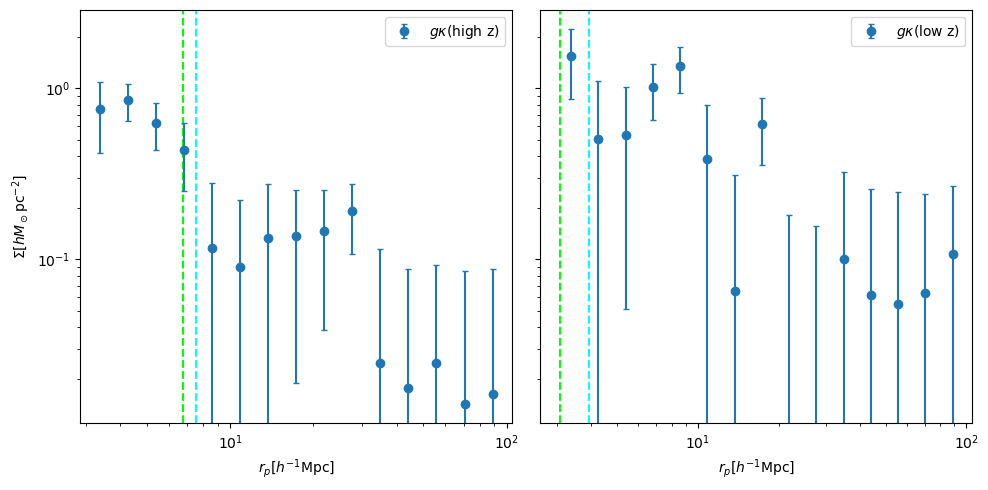

In [23]:
res_1 = np.loadtxt('./results/quasar_highz_15_cmb_lcut_n_2048')
res_2 = np.loadtxt('./results/quasar_lowz_15_cmb_lcut_n_2048')
r_p = res_1[:,0]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

z = quasar_highz['z'].mean()
z_max = quasar_highz['z'].max()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax = axes[0]
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.errorbar(r_p, res_1[:,1], res_1[:,2], capsize=2, fmt='o', label='$g\\kappa$(high z)')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
ax.loglog()
ax.legend()

z = quasar_lowz['z'].mean()
z_max = quasar_lowz['z'].max()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax = axes[1]
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.errorbar(r_p, res_2[:,1], res_2[:,2], capsize=2, fmt='o', label='$g\\kappa$(low z)')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.loglog()
ax.legend()

plt.tight_layout()
plt.show()

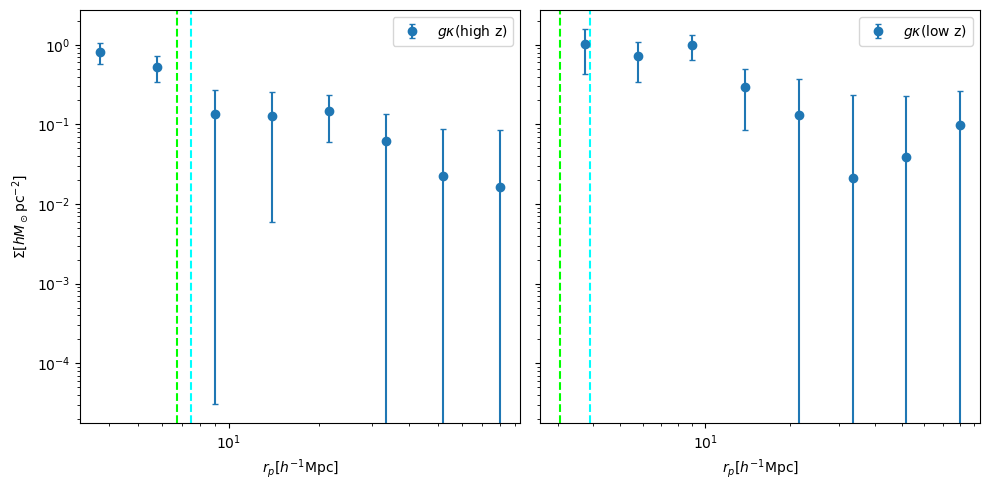

In [24]:
res_1 = np.loadtxt('./results/quasar_highz_8_cmb_lcut_n_2048')
res_2 = np.loadtxt('./results/quasar_lowz_8_cmb_lcut_n_2048')
r_p = res_1[:,0]
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

z = quasar_highz['z'].mean()
z_max = quasar_highz['z'].max()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax = axes[0]
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.errorbar(r_p, res_1[:,1], res_1[:,2], capsize=2, fmt='o', label='$g\\kappa$(high z)')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
ax.loglog()
ax.legend()

z = quasar_lowz['z'].mean()
z_max = quasar_lowz['z'].max()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax = axes[1]
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.errorbar(r_p, res_2[:,1], res_2[:,2], capsize=2, fmt='o', label='$g\\kappa$(low z)')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.loglog()
ax.legend()

plt.tight_layout()
plt.show()

# divide the whole lss sample into 2 luminosity bins

In [51]:
z = quasar_lss_all['z'].mean()
z_max = quasar_lss_all['z'].max()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
lmax = 2048
angular_scale = 200/lmax * np.pi/180

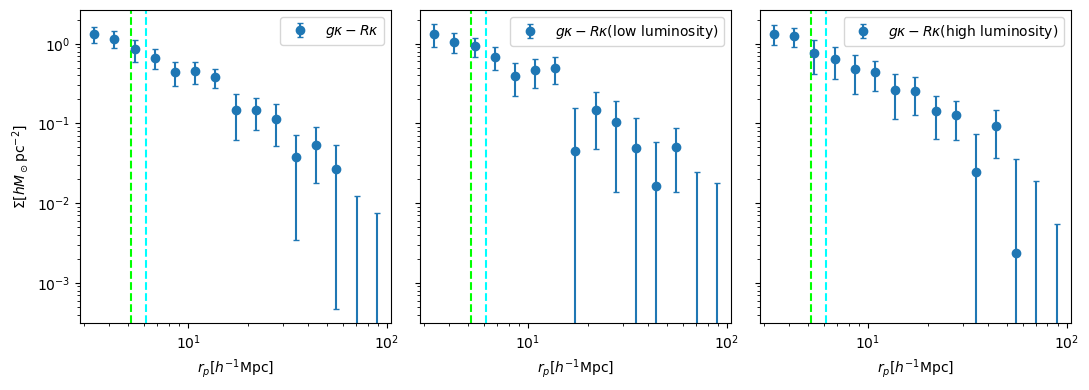

In [50]:
res_1 = np.loadtxt('./results/quasar_lss_all_cmb_lcut_2048')
res_2 = np.loadtxt('./results/quasar_lss_all_low_L_cmb_lcut_n_2048')
res_3 = np.loadtxt('./results/quasar_lss_all_high_L_cmb_lcut_n_2048')
res = [res_1, res_2, res_3]
labels = ['$g\\kappa-R\\kappa$', '$g\\kappa-R\\kappa$(low luminosity)', '$g\\kappa-R\\kappa$(high luminosity)']
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(11, 4))
for i in range(3):
    ax = axes[i]
    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=labels[i])
    ax.axvline(x=distance*angular_scale, linestyle='--', c='lime')
    ax.axvline(x=distance_max*angular_scale, linestyle='--', c='cyan')
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend()
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

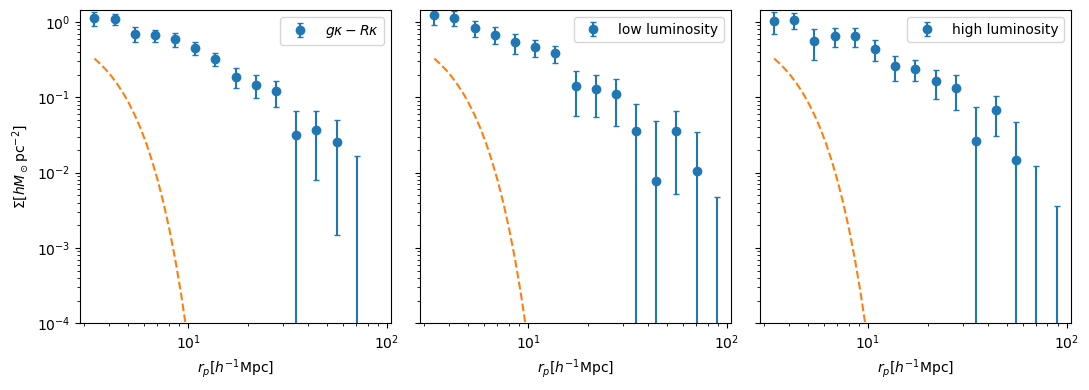

In [54]:
res_1 = np.loadtxt('./results/quasar_lss_all_cmb_smoothed_6')
res_2 = np.loadtxt('./results/quasar_lss_all_lowL_cmb_smoothed_6')
res_3 = np.loadtxt('./results/quasar_lss_all_highL_cmb_smoothed_6')
res = [res_1, res_2, res_3]
labels = ['$g\\kappa-R\\kappa$', 'low luminosity', 'high luminosity']
r_pp = np.geomspace(r_p[0], r_p[-1], 50)
sigma_angular = (6 * u.arcmin).to(u.rad).value / np.sqrt(8*np.log(2))
sigma = distance*sigma_angular
y = np.exp(-r_pp*r_pp/(2*sigma*sigma))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(11, 4))
for i in range(3):
    ax = axes[i]
    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=labels[i])
    ax.plot(r_pp, y, '--')
    ax.set_ylim(bottom=1e-4)
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend()
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

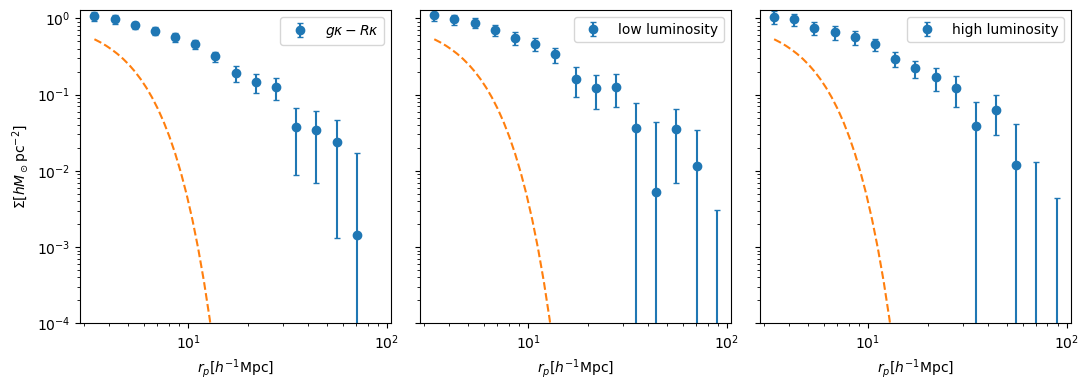

In [53]:
res_1 = np.loadtxt('./results/quasar_lss_all_cmb_smoothed_8')
res_2 = np.loadtxt('./results/quasar_lss_all_lowL_cmb_smoothed_8')
res_3 = np.loadtxt('./results/quasar_lss_all_highL_cmb_smoothed_8')
res = [res_1, res_2, res_3]
labels = ['$g\\kappa-R\\kappa$', 'low luminosity', 'high luminosity']
r_pp = np.geomspace(r_p[0], r_p[-1], 50)
sigma_angular = (8 * u.arcmin).to(u.rad).value / np.sqrt(8*np.log(2))
sigma = distance*sigma_angular
y = np.exp(-r_pp*r_pp/(2*sigma*sigma))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(11, 4))
for i in range(3):
    ax = axes[i]
    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=labels[i])
    ax.plot(r_pp, y, '--')
    ax.set_ylim(bottom=1e-4)
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend(loc='upper right')
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

# divide the z-cut[1<z<2] lss sample into 2 luminosity bins

In [ ]:
z = quasar_lss['z'].mean()
z_max = quasar_lss['z'].max()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
lmax = 2048
angular_scale = 200/lmax * np.pi/180

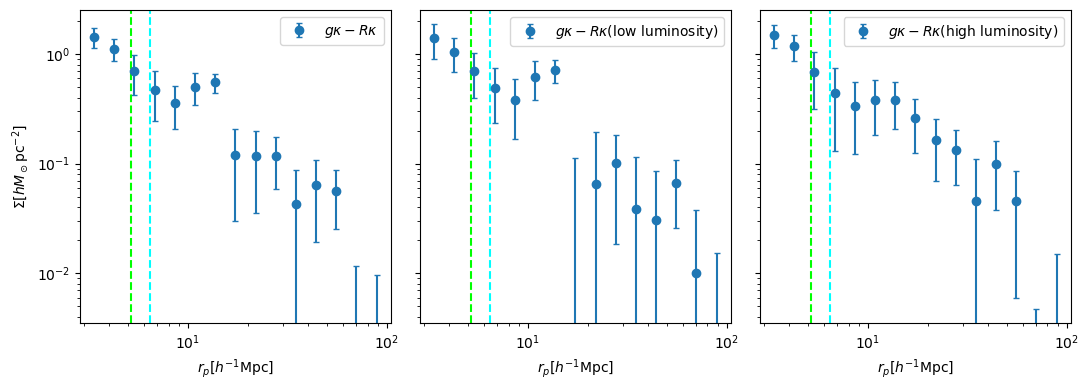

In [ ]:
res_1 = np.loadtxt('./results/quasar_lss_cmb_lcut_n_2048')
res_2 = np.loadtxt('./results/quasar_lss_low_L_cmb_lcut_n_2048')
res_3 = np.loadtxt('./results/quasar_lss_high_L_cmb_lcut_n_2048')
res = [res_1, res_2, res_3]
labels = ['$g\\kappa-R\\kappa$', '$g\\kappa-R\\kappa$(low luminosity)', '$g\\kappa-R\\kappa$(high luminosity)']
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(11, 4))
for i in range(3):
    ax = axes[i]
    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=labels[i])
    ax.axvline(x=distance*angular_scale, linestyle='--', c='lime')
    ax.axvline(x=distance_max*angular_scale, linestyle='--', c='cyan')
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend()
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

# divide the whole lss sample into 3 redshift bins

In [ ]:
lmax = 2048
angular_scale = 200/lmax * np.pi/180

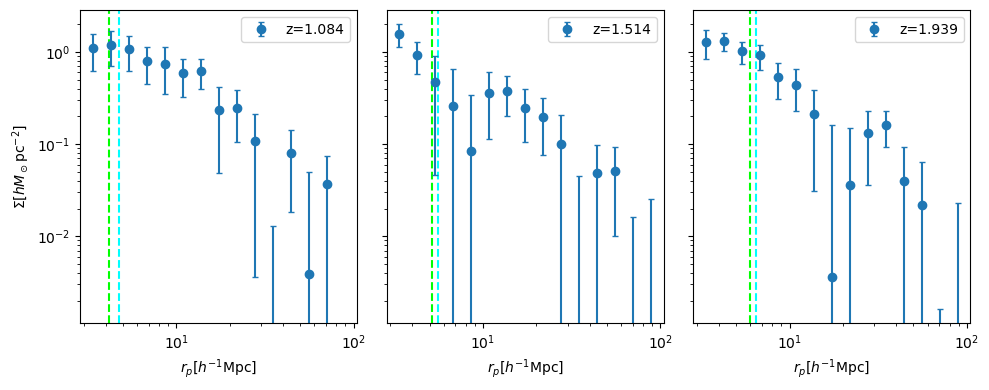

In [ ]:
res = [np.loadtxt(f'./results/quasar_lss_all_z{i}_2_cmb_lcut_n_2048') for i in range(1, 4)]
labels = [f'$g\\kappa-R\\kappa$[z{i}]' for i in range(1, 4)]
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
digitize_res = np.digitize(quasar_lss_all['z'], np.percentile(quasar_lss_all['z'], [0, 100/3, 200/3, 100]))
for i in range(3):
    ax = axes[i]
    zs = quasar_lss_all['z'][digitize_res == i+1]
    z = zs.mean()
    z_max = zs.max()
    distance = cosmos.comoving_distance(z).to('Mpc').value*h
    distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h

    ax.axvline(x=distance*angular_scale, linestyle='--', c='lime')
    ax.axvline(x=distance_max*angular_scale, linestyle='--', c='cyan')
    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=f'z={z:.3f}')
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend()
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

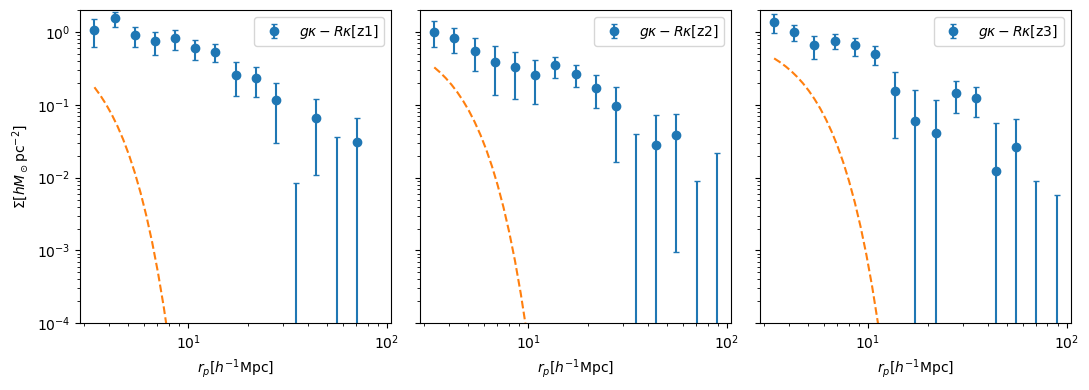

In [58]:
res = [np.loadtxt(f'./results/quasar_lss_all_z{i}_2_cmb_smoothed_6') for i in range(1, 4)]
labels = [f'$g\\kappa-R\\kappa$[z{i}]' for i in range(1, 4)]

r_pp = np.geomspace(r_p[0], r_p[-1], 50)
sigma_angular = (6 * u.arcmin).to(u.rad).value / np.sqrt(8*np.log(2))


digitize_res = np.digitize(quasar_lss_all['z'], np.percentile(quasar_lss_all['z'], [0, 100/3, 200/3, 100]))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(11, 4))
for i in range(3):
    ax = axes[i]
    zs = quasar_lss_all['z'][digitize_res == i+1]
    z = zs.mean()
    distance = cosmos.comoving_distance(z).to('Mpc').value*h
    sigma = distance*sigma_angular
    y = np.exp(-r_pp*r_pp/(2*sigma*sigma))

    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=labels[i])
    ax.plot(r_pp, y, '--')
    ax.set_ylim(bottom=1e-4)
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend(loc='upper right')
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

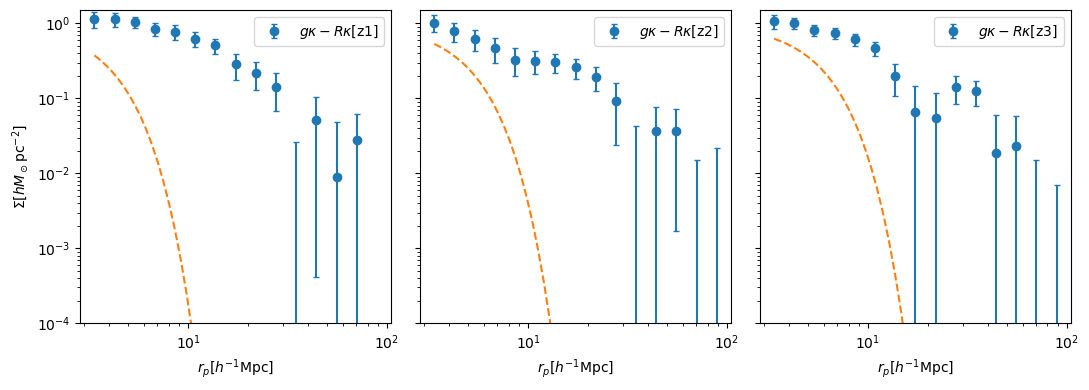

In [57]:
res = [np.loadtxt(f'./results/quasar_lss_all_z{i}_2_cmb_smoothed_8') for i in range(1, 4)]
labels = [f'$g\\kappa-R\\kappa$[z{i}]' for i in range(1, 4)]

r_pp = np.geomspace(r_p[0], r_p[-1], 50)
sigma_angular = (8 * u.arcmin).to(u.rad).value / np.sqrt(8*np.log(2))


digitize_res = np.digitize(quasar_lss_all['z'], np.percentile(quasar_lss_all['z'], [0, 100/3, 200/3, 100]))

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(11, 4))
for i in range(3):
    ax = axes[i]
    zs = quasar_lss_all['z'][digitize_res == i+1]
    z = zs.mean()
    distance = cosmos.comoving_distance(z).to('Mpc').value*h
    sigma = distance*sigma_angular
    y = np.exp(-r_pp*r_pp/(2*sigma*sigma))

    ax.errorbar(res[i][:,0], res[i][:,1], res[i][:,2], capsize=2, fmt='o', label=labels[i])
    ax.plot(r_pp, y, '--')
    ax.set_ylim(bottom=1e-4)
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend(loc='upper right')
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
plt.tight_layout()
plt.show()

## divide using position

In [ ]:
lmax = 2048
angular_scale = 200/lmax * np.pi/180
res_1 = np.loadtxt('./results/quasar_lss_all_low_b_cmb_lcut_n_2048')
res_2 = np.loadtxt('./results/quasar_lss_all_high_b_cmb_lcut_n_2048')

r_p = res_1[:,0]

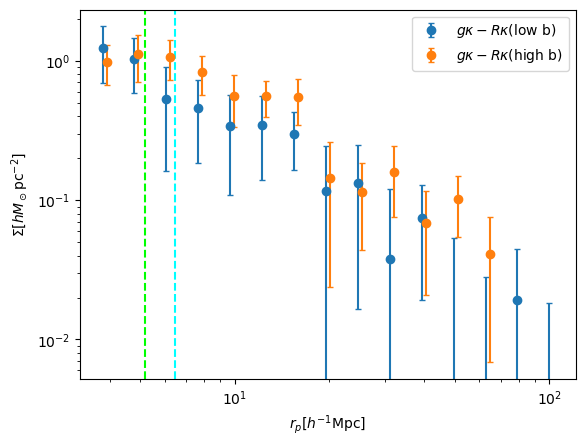

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(r_p, res_1[:,1], res_1[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$(low b)')
ax.errorbar(r_p*shift, res_2[:,1], res_2[:,2], capsize=2, fmt='o', label='$g\\kappa-R\\kappa$(high b)')

z = quasar_lss_all['z'].mean()
distance = cosmos.comoving_distance(z).to('Mpc').value*h
z_max = quasar_lss_all['z'].max()
distance_max = cosmos.comoving_distance(z_max).to('Mpc').value*h
ax.axvline(x=distance*angular_scale, linestyle='--', color='lime')
ax.axvline(x=distance_max*angular_scale, linestyle='--', color='cyan')
ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
ax.set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')
ax.loglog()
ax.legend(loc='upper right')

plt.show()

## divide on M_I-z plain

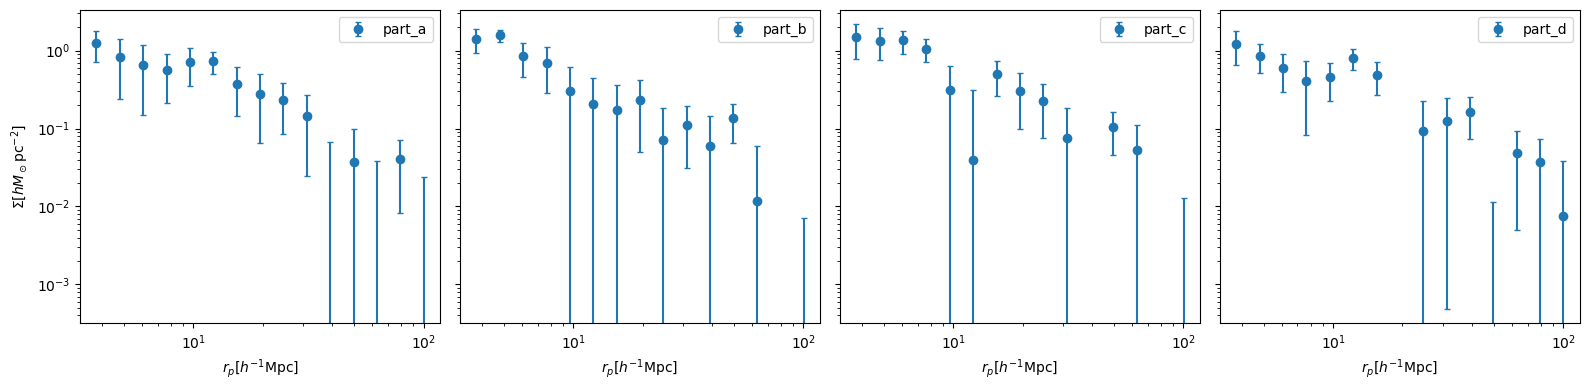

In [ ]:
lmax = 2048
angular_scale = 200/lmax * np.pi/180

r_p = res_1[:,0]

fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
axes[0].set_ylabel('$\\Sigma[hM_\\odot \\mathrm{pc^{-2}}]$')

for i in range(4):
    ax = axes[i]
    label = f'part_{'abcd'[i]}'
    res = np.loadtxt(f'./results/quasar_lss_all_{label}_cmb_lcut_n_2048')
    ax.errorbar(r_p, res[:,1], res[:,2], capsize=2, fmt='o', label=label)
    ax.set_xlabel('$r_p[h^{-1}\\mathrm{Mpc}]$')
    ax.loglog()
    ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

## different $l$ cut

In [ ]:
for l in [512, 1024, 2048]:
    res = np.loadtxt(f'./results/quasar_lss_all_cmb_lcut_{l}')
    angular_scale = 200/l * np.pi/180
    plt.errorbar(res[:,0], res[:,1], res[:,2], capsize=2, fmt='-o', label='$g\\kappa-R\\kappa[l_{max} = %s]$'%(l,))
    z = quasar_lss_all['z'].mean()
    distance = cosmos.comoving_distance(z).to('Mpc').value*h
    plt.axvline(x=distance*angular_scale, linestyle='--')
plt.loglog()
plt.legend()